A1 149.83060849224526 2.2105308808257207
A2 149.96618456679428 2.1612435187006245
A3 150.10175329130632 2.111943456573772
A4 150.23731326578584 2.062631644446241
A5 150.37286289023743 2.013309032319107
A6 149.7647850185184 2.0296854374792526
A7 149.9003454431693 1.9804026753817368
A8 150.03589926778474 1.9311082632823562
A9 150.17144509237895 1.8818031511845486
A10 150.30698131694916 1.8324881890870612
B1 149.96220693940455 2.5720372673973584
B2 150.09747486414722 2.5230015052794137
B3 150.23328673819674 2.473525843055812
B4 150.36919886197347 2.423885930793452
B5 150.50453028662352 2.374833668674315
B6 149.89657956583684 2.3912872741259417
B7 150.03225868964083 2.341569861870867
B8 150.16766126474636 2.292723449827574
B9 150.30327548908838 2.2433903376662596
B10 150.4387048134958 2.1941086255207374


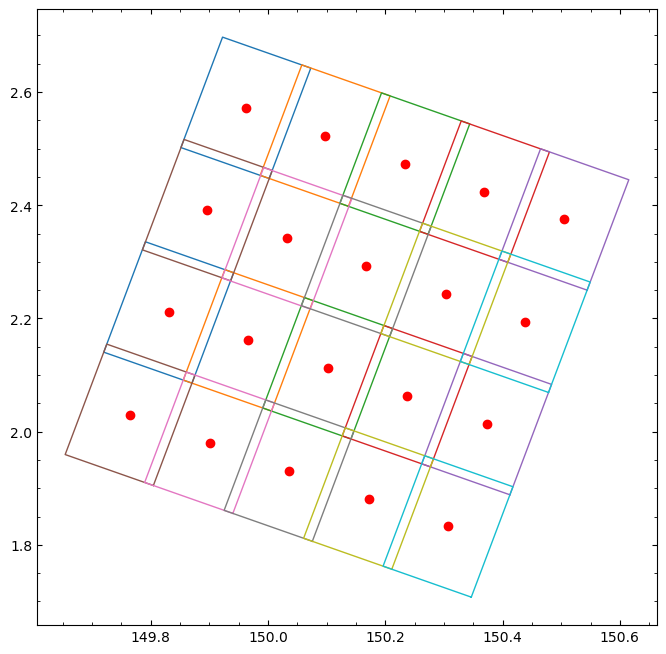

In [13]:

import numpy as np
from astropy.io import fits
import warnings
warnings.simplefilter('ignore')
from astropy.wcs import WCS
# wcs = WCS(fits.open('/Users/hba423/data/COSMOS-Web/mosaics/Apr23/mask_f115w_tile_A10_60mas.fits')[0].header)
tiles = np.array(['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','B1','B2','B3','B4','B5','B6','B7','B8','B9','B10'])

import matplotlib.pyplot as plt
plt.style.use('hba_sans')

fig, ax = plt.subplots(figsize=(8,8))

from regions import Regions
for i in range(len(tiles)):
    t = Regions.read(f'/data/COSMOS-Web/regionfiles/tile_{tiles[i]}.reg', format='ds9')
    c1,c2,c3,c4 = t[0].vertices
    ax.plot([c.ra.value for c in [c1,c2,c3,c4,c1]], [c.dec.value for c in [c1,c2,c3,c4,c1]])

    pa = c1.position_angle(c3)
    sep = c1.separation(c3)
    midpoint = c1.directional_offset_by(pa, sep/2)  
    ax.scatter(midpoint.ra.value, midpoint.dec.value, c='r')

    print(tiles[i], midpoint.ra.value, midpoint.dec.value)
    # if t[0].contains(coord, wcs):
    #     in_tile[i] = True
    
plt.show()